In [ ]:
from neuron import h,gui
import numpy as np
from neuron.units import mV,ms,um
#h.load_file("nrngui.hoc") # load gui
#Called only by CellChooser
h.load_file("interpCoordinates.hoc") #interp_coordinates 
h.load_file("setPointers.hoc")

h.load_file("calcVe_noGUI.hoc") # Can be replaced with calcrx.py # add plots
# h.load_file("stimWaveform.hoc") # Can be replaced with stim.py #add stim plot
h.load_file("cellChooser.hoc")
h.load_file("setParams.hoc")
h.load_file("editMorphology.hoc")
h.load_file("stdrun.hoc")
#h.createPanels() #SetParams
h.load_file("plot_max.hoc")
h.load_file("field.hoc")
# from blenderneuron import neuronstart

	1 
BlenderNEURON running in NEURON and accessible by Blender with BlenderNEURON addon at: http://127.0.0.1:61806


In [ ]:
#Initializes the cell
id=4 # between 1 and 25
cell_name = h.cell_names.o(id-1).s  # `.s` converts HOC String to Python string
h.setParamsAdultHuman()
h.myelinate_ax=1
h.cell_chooser(id)
print(cell_name)
cell=h.cell

	1 
	1 
	1 
	1 
	1 
	1 
	1 
	1 
*---------*
Loaded Blue Brain cell: L1_NGC-DA_bNAC219_4
numSect was 307
Created List of SectionRefs for 307 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Got main axon (method 2)
Myelinating axon: Replacing 266 Axonal sections w/ 282 Myelin, 282 Node, 107 Unmyelin sections
No myelin before 1st bifurcation
Scaled diameter of myelin sections using variable g-ratio
numSect was 712
Created List of SectionRefs for 712 sections
Assigned section types to each section in type_xtra
Assigned branch orders using traverse_tree (assign_order2) in order_xtra
Inserted xtra and extracellular in all 1108 compartments
Got main axon (method 2)
Cell Loaded
L1_NGC-DA_bNAC219_4


: 

In [3]:
h.theta = 180 
h.phi = 0 
h.stim_mode=2
h.getes()

Calculated potentials for theta = 180 deg, phi = 0 deg


0.0

In [4]:
#cell=h.cell
for sec in h.allsec():
    print(sec.name())

bNAC219_L1_NGCDA_b030a58a66[0].soma[0]
bNAC219_L1_NGCDA_b030a58a66[0].axon[0]
bNAC219_L1_NGCDA_b030a58a66[0].dend[0]
bNAC219_L1_NGCDA_b030a58a66[0].dend[1]
bNAC219_L1_NGCDA_b030a58a66[0].dend[2]
bNAC219_L1_NGCDA_b030a58a66[0].dend[3]
bNAC219_L1_NGCDA_b030a58a66[0].dend[4]
bNAC219_L1_NGCDA_b030a58a66[0].dend[5]
bNAC219_L1_NGCDA_b030a58a66[0].dend[6]
bNAC219_L1_NGCDA_b030a58a66[0].dend[7]
bNAC219_L1_NGCDA_b030a58a66[0].dend[8]
bNAC219_L1_NGCDA_b030a58a66[0].dend[9]
bNAC219_L1_NGCDA_b030a58a66[0].dend[10]
bNAC219_L1_NGCDA_b030a58a66[0].dend[11]
bNAC219_L1_NGCDA_b030a58a66[0].dend[12]
bNAC219_L1_NGCDA_b030a58a66[0].dend[13]
bNAC219_L1_NGCDA_b030a58a66[0].dend[14]
bNAC219_L1_NGCDA_b030a58a66[0].dend[15]
bNAC219_L1_NGCDA_b030a58a66[0].dend[16]
bNAC219_L1_NGCDA_b030a58a66[0].dend[17]
bNAC219_L1_NGCDA_b030a58a66[0].dend[18]
bNAC219_L1_NGCDA_b030a58a66[0].dend[19]
bNAC219_L1_NGCDA_b030a58a66[0].dend[20]
bNAC219_L1_NGCDA_b030a58a66[0].dend[21]
bNAC219_L1_NGCDA_b030a58a66[0].dend[22]
bNAC219_L1_N

In [5]:
# Set up APCount
apc_soma=h.APCount(cell.soma[0](0.5))
apc_dend=h.APCount(cell.dend[0](0.5))
apc_axon=h.APCount(cell.axon[0](0.5))

#Create vectors to record
sap_times=h.Vector()
dap_times=h.Vector()
aap_times=h.Vector()

#Set up Spike Recording
apc_soma.record(sap_times)
apc_dend.record(dap_times)
apc_axon.record(aap_times)

1.0

In [6]:
#Record things
t=h.Vector().record(h._ref_t)
is_xtra=h.Vector().record(h._ref_stim_xtra)
soma_v=h.Vector().record(cell.soma[0](0.5)._ref_v)
dend_v=h.Vector().record(cell.dend[0](0.5)._ref_v)
axon_v=h.Vector().record(cell.axon[0](0.5)._ref_v)
extracellular_e = h.Vector().record(cell.soma[0](0.5)._ref_e_extracellular)
extracellular_v_soma = h.Vector().record(cell.soma[0](0.5)._ref_vext[0])
vrec = h.Vector().record(h._ref_vrec)  # records vrec at each timestep


In [7]:
import stim

simtime=100
dt=0.01
ton=10
amp=-1000
depth=1
dur=50
freq=100
modfreq=10
time,stim1=stim.ampmodulation_wiki(ton,amp,depth,dt,dur,simtime,freq,modfreq)
print(time.to_python())
print(stim1.to_python())

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35000000000000003, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41000000000000003, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47000000000000003, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.5700000000000001, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.6900000000000001, 0.7000000000000001, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.8200000000000001, 0.8300000000000001, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.9400000000000001, 0.9500000000000001, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.1300000000000001, 1.1400000000000001, 1.1500000000000001, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1

In [ ]:
celsius=h.celsius
simparams=[dt,simtime,celsius]
stimparams=[1,ton,amp,dur,freq,depth,modfreq]
from savedata import saveparams
run_id=0
folder=saveparams(run_id,cell,simparams,stimparams)
h.tstop=simtime
h.dt=dt
h.celsius=36

c:\Users\Pc\Documents\GitHub\241165


: 

In [ ]:
#h.load_file("rig.ses") # Run control

h.finitialize(-65*mV)
h.continuerun(simtime)

NEURON: PlotShape addexpr
 near line 0
 v
  ^
        newPlotV()
      doNotify()
    screen_update()
  continuerun(500

: 

In [10]:
from savedata import savedata
savedata(folder,run_id,t,soma_v,dend_v,axon_v,extracellular_v_soma,is_xtra,vrec)

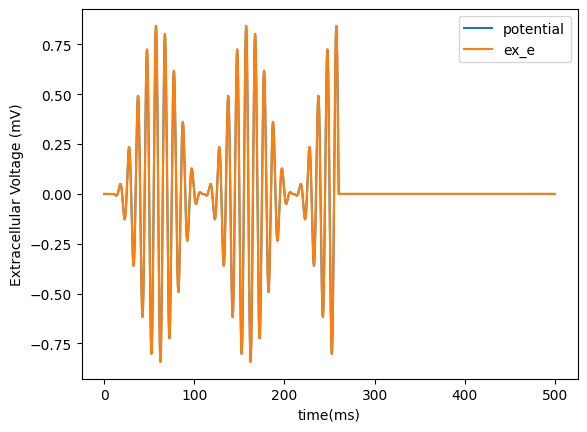

In [11]:
import matplotlib.pyplot as plt
from savedata import saveplot
#plot extracellular voltage over time
#potential at the external surface of the soma
title1="Extracellular potential (mV)"
fig,ax=plt.subplots()
ax.plot(t,extracellular_v_soma,label="potential")
ax.plot(t,extracellular_e,label="ex_e")
ax.set_xlabel("time(ms)")
ax.set_ylabel("Extracellular Voltage (mV)")
ax.legend()
plt.show()
saveplot(folder, title1, fig) 
# print(list(t))

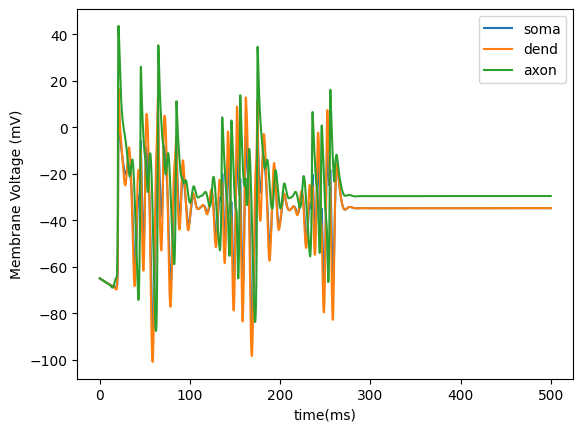

In [12]:
#plot intracellular voltage over time
fig,ax=plt.subplots()
ax.plot(t,soma_v,label="soma")
ax.plot(t,dend_v,label="dend")
ax.plot(t,axon_v,label="axon")
ax.set_xlabel("time(ms)")
ax.set_ylabel("Membrane Voltage (mV)") #vint-vext~
ax.legend()
title1="Membrane Potential"

plt.show()
saveplot(folder,title1,fig)

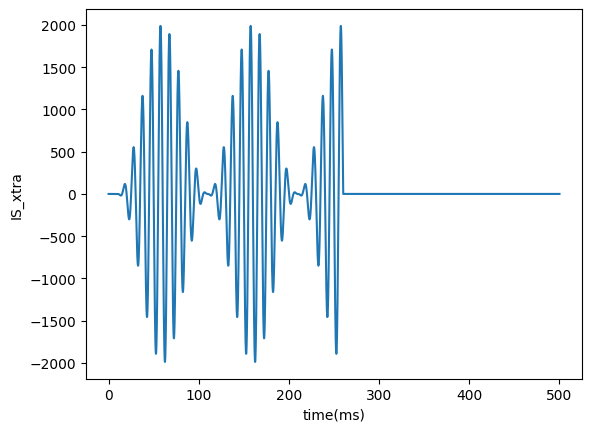

In [13]:
#plot is over time
fig,ax=plt.subplots()
ax.plot(t,is_xtra)
ax.set_xlabel("time(ms)")
ax.set_ylabel("IS_xtra")
title1="Stimulation"
plt.show()
saveplot(folder,title1,fig)

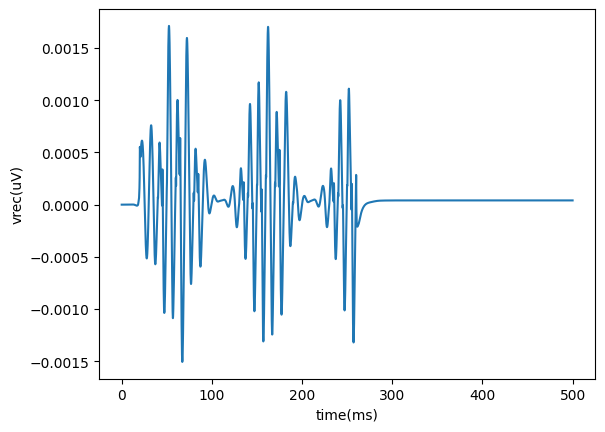

In [14]:
#plot vrec
fig,ax=plt.subplots()
ax.plot(t,vrec)
ax.set_xlabel("time(ms)")
ax.set_ylabel("vrec(uV)")
title1="Recorded Potential"
plt.show()
saveplot(folder,title1,fig)

In [ ]:
soma_spikes = sap_times.to_python()
dend_spikes = dap_times.to_python()
axon_spikes = aap_times.to_python()


spiketimes = [soma_spikes,dend_spikes,axon_spikes]
from savedata import savespikes
savespikes(folder,id,spiketimes)

fig, ax = plt.subplots()

ax.scatter(soma_spikes, [1] * len(soma_spikes), color='red', label='Soma')
ax.scatter(dend_spikes, [2] * len(dend_spikes), color='blue', label='Dend')
ax.scatter(axon_spikes, [3] * len(axon_spikes), color='green', label='Axon')
ax.set_xlim(0,simtime)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Cell part")
ax.set_title("Raster Plot of Spike Times")
ax.legend(title="Legend")
plt.show()
title1="SpikeTimes"

saveplot(folder,title1,fig)

print(spiketimes)

ValueError: All arrays must be of the same length

: 